In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv', delimiter=',')

In [3]:
print ("Dataset Lenght:: ", len(data))

Dataset Lenght::  128


In [4]:
print ("Dataset Shape:: ", data.shape)

Dataset Shape::  (128, 27)


In [5]:
print ("Dataset:: ")
data.head()

Dataset:: 


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [6]:
print ("Dataset Info:: ")
data.info()

Dataset Info:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  12

In [7]:
print ("Missing Value:: ")
data.isnull().sum()

Missing Value:: 


Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [8]:
data = data.drop(['Date','Team','Opponent'], axis=1)

In [9]:
data['1st Goal'].fillna(0, inplace=True)
data['Own goals'].fillna(0, inplace=True)
data['Own goal Time'].fillna(0, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Round'] = label_encoder.fit_transform(data['Round'])
data['PSO'] = label_encoder.fit_transform(data['PSO'])

In [11]:
data.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,Yes,12.0,2,0,0,0.0,0.0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,No,0.0,2,0,0,0.0,0.0
2,0,43,8,3,3,2,0,1,7,3,...,2,0,0,No,0.0,2,0,0,0.0,0.0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,Yes,89.0,2,0,0,0.0,0.0
4,0,64,13,3,6,4,5,0,14,2,...,1,0,0,No,0.0,2,0,0,1.0,90.0


In [12]:
# Separating the Target Variable

X = np.concatenate([data.values[:, 0:17], data.values[:, 18:25]], axis=1)
Y = data.values[:, 17]

In [13]:
type(X)

numpy.ndarray

In [14]:
data.isnull().sum()

Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [16]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [17]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [18]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 69.23076923076923)

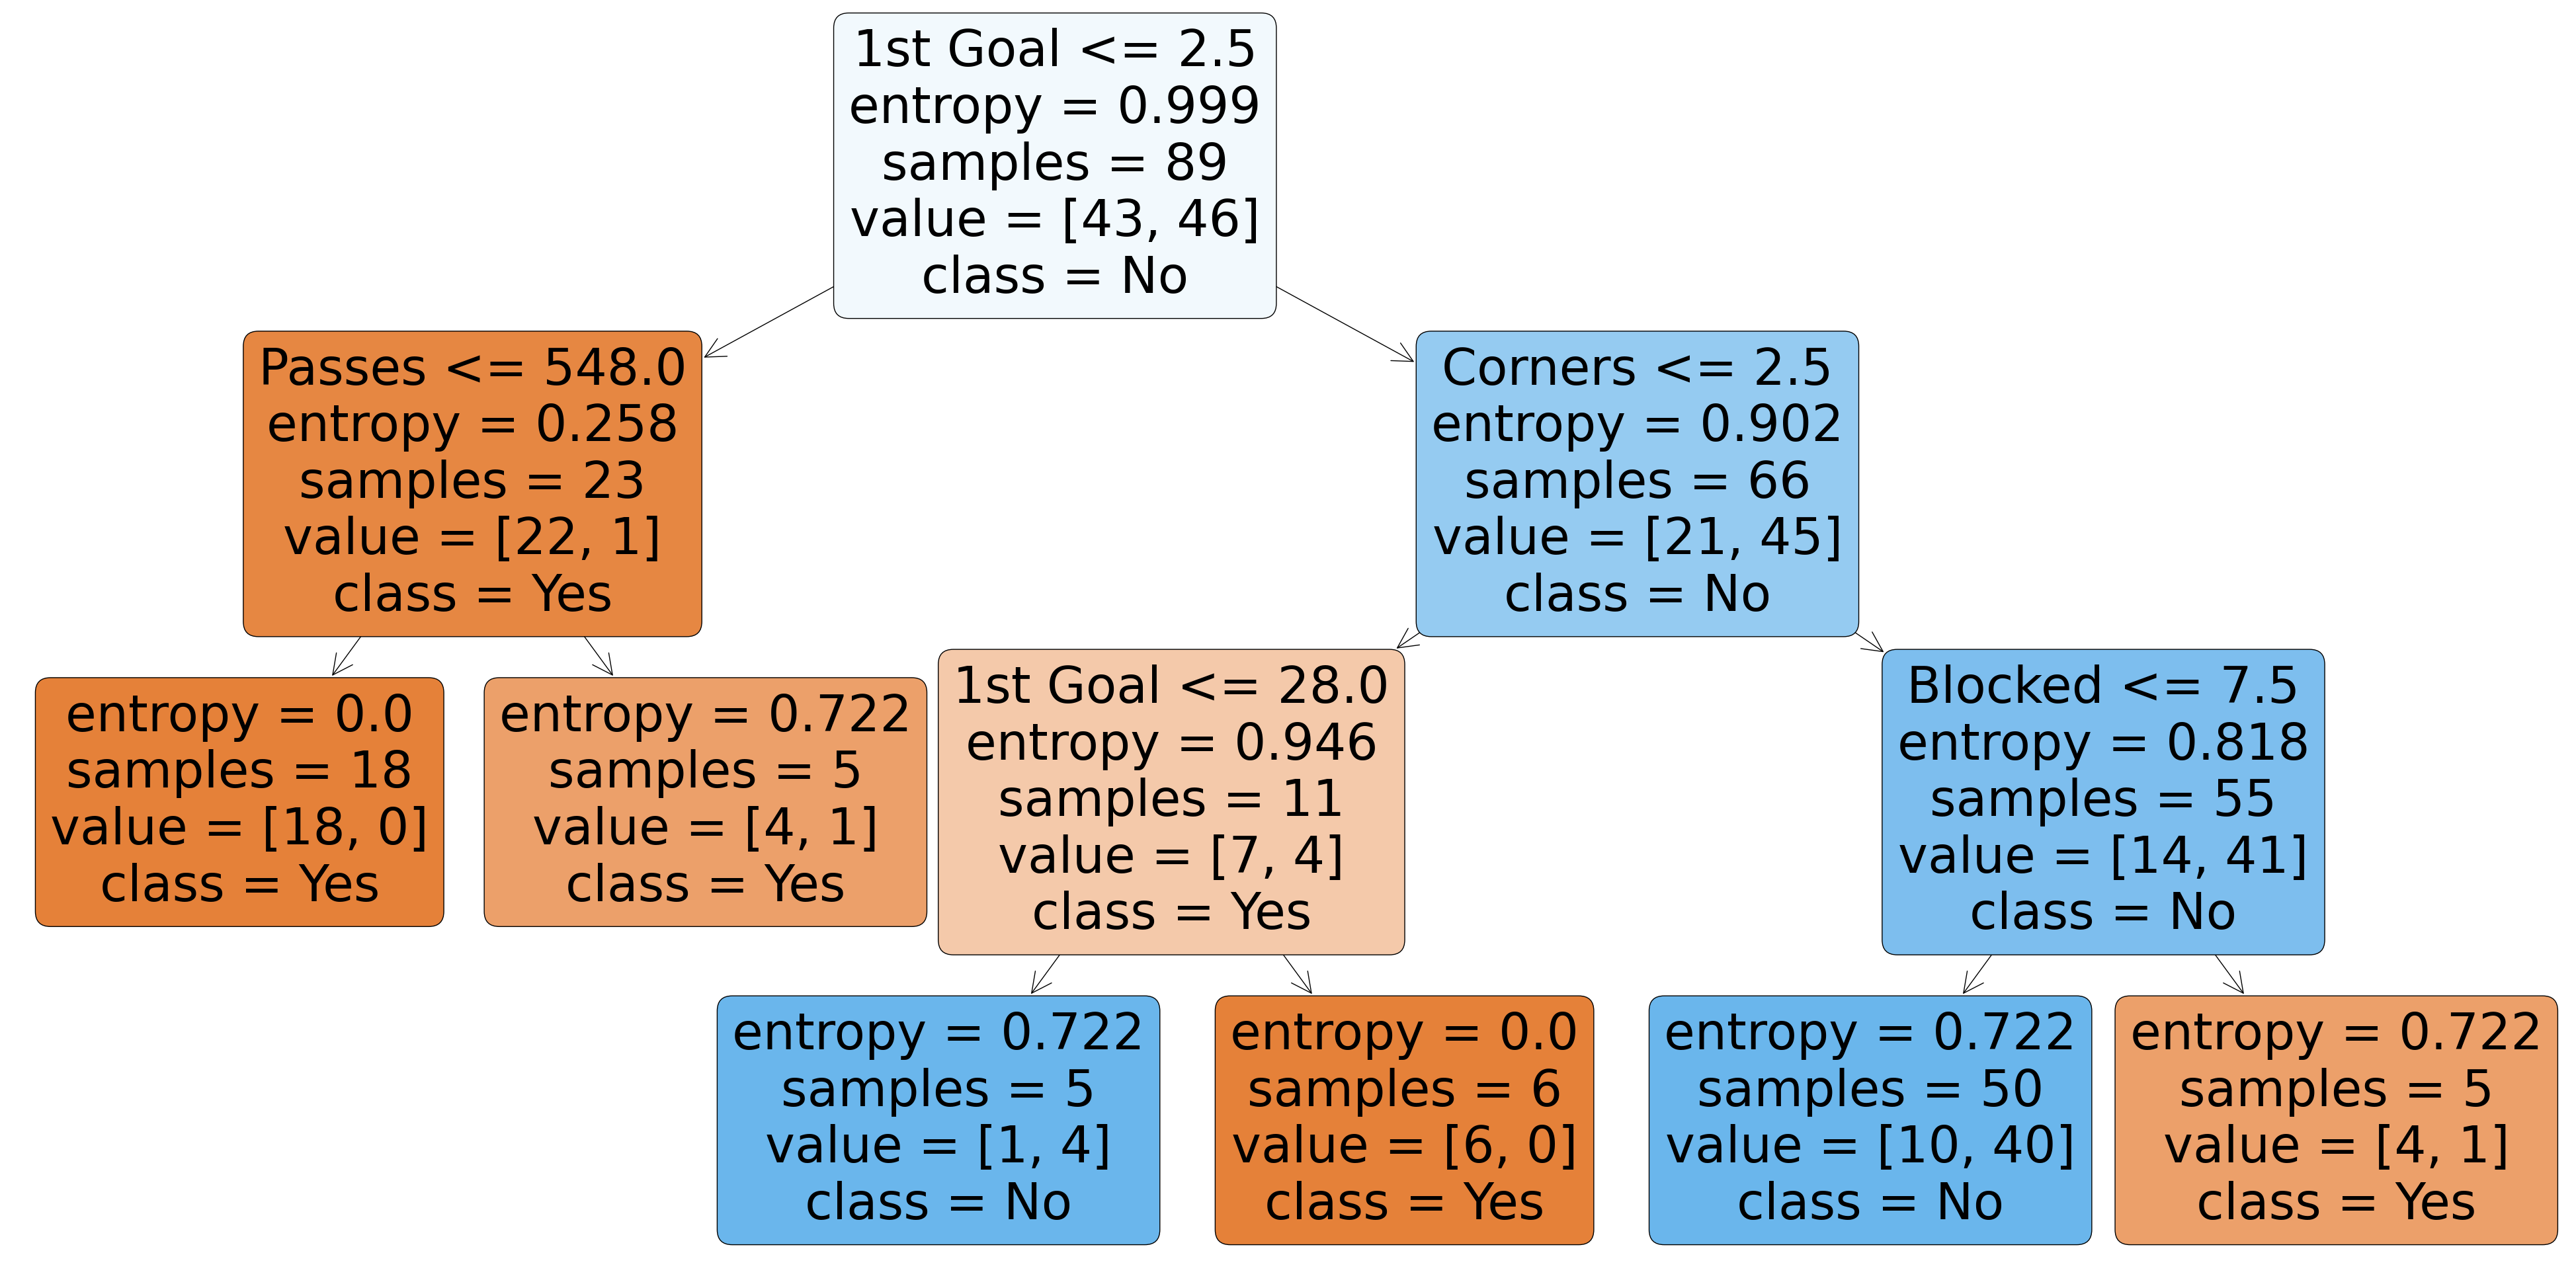

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf_entropy
plt.figure(figsize=(50,25))
plot_tree(clf_entropy,
          filled=True,
          rounded=True,
          class_names=["Yes", "No"],
          feature_names=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
                         'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
                         'Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time'])
plt.show()

In [20]:
"""
Initial 'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
        'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
        'Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time'
"""
hypothetical_borrower = np.array([[5, 40, 13, 7,3,3,6,3,11,0,78,306,118,22,0,0,0,12,2,0,0,0,0]])
prediction = clf_entropy.predict(hypothetical_borrower)
print(prediction)

['Yes']
